In [1]:
from utils import *

random_state = 21

In [2]:
cwd = pathlib.Path.cwd()
project_cwd = cwd.parent

df = pd.read_csv(f'{project_cwd}/data/heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Check for nan values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [6]:
data = df.copy()

col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [7]:
# Converting object columns to numeric - "LabelEncoder"

# instanciar encoder
lb = LabelEncoder()

objList = data.select_dtypes(include = "object").columns

for obj in objList:
    # Stampo i valori unici prima dell'encoding
    print(f"\n======== {obj} ========")
    print("Before encoding:")
    unique_values = data[obj].unique()
    print(unique_values)

    
    data[obj] = lb.fit_transform(data[obj].astype(str))

    # Stampo il mapping tra valori originali e valori codificati
    print("\nMAPPING of the encoding:")
    for i, original_value in enumerate(lb.classes_):
        encoded_value = lb.transform([original_value])[0]
        print(f"'{original_value}' → {encoded_value}")
    
    # Stampo i valori unici dopo l'encoding
    print("\nAfter encoding:")
    print(data[obj].unique())
    
    print(f"==========================")


======== Sex ========
Before encoding:
['M' 'F']

MAPPING of the encoding:
'F' → 0
'M' → 1

After encoding:
[1 0]

======== ChestPainType ========
Before encoding:
['ATA' 'NAP' 'ASY' 'TA']

MAPPING of the encoding:
'ASY' → 0
'ATA' → 1
'NAP' → 2
'TA' → 3

After encoding:
[1 2 0 3]

======== RestingECG ========
Before encoding:
['Normal' 'ST' 'LVH']

MAPPING of the encoding:
'LVH' → 0
'Normal' → 1
'ST' → 2

After encoding:
[1 2 0]

======== ExerciseAngina ========
Before encoding:
['N' 'Y']

MAPPING of the encoding:
'N' → 0
'Y' → 1

After encoding:
[0 1]

======== ST_Slope ========
Before encoding:
['Up' 'Flat' 'Down']

MAPPING of the encoding:
'Down' → 0
'Flat' → 1
'Up' → 2

After encoding:
[2 1 0]


In [ ]:
data.hist(figsize=(15,12));

### Binning of the numerical data

In [8]:
# Converting numeric columns to bins
labels = [0, 1, 2]

# --- 1. Categorize Age ---
age_bins = [-float('inf'), 44, 60, float('inf')] # Bins for <44, 45-60, >60

data['Age_Category'] = pd.cut(data['Age'], bins=age_bins, labels=labels, right=True)

print(data[['Age', 'Age_Category']].head())
print("- " * 20)

# --- 2. Categorize RestingBP ---
bp_bins = [-np.inf, 119, 139, np.inf] # Bins for <120, 120-139, >=140

data['RestingBP_Category'] = pd.cut(data['RestingBP'], bins=bp_bins, labels=labels, right=True)

print(data[['RestingBP', 'RestingBP_Category']].head())
print("- " * 20)

# --- 3. Categorize Cholesterol ---
chol_bins = [-1, 0, 199, 239, np.inf] # Bins for 0, 1-199, 200-239, >=240
chol_labels = [0, 1, 2, 3]

data['Cholesterol_Category'] = pd.cut(data['Cholesterol'].fillna(-1), bins=chol_bins, labels=chol_labels, right=True)
print(data[['Cholesterol', 'Cholesterol_Category']].head())
print("- " * 20)

# --- 4. Categorize MaxHR ---
data['MaxHR_Category'] = pd.qcut(data['MaxHR'], q=3, labels=labels, duplicates='drop')

print(data[['MaxHR', 'MaxHR_Category']].head())
print("- " * 20)

# --- 5. Categorize Oldpeak ---
oldpeak_bins = [-np.inf, 0.99, 2.5, np.inf] # Bins for <1.0, 1.0-2.5, >2.5

data['Oldpeak_Category'] = pd.cut(data['Oldpeak'], bins=oldpeak_bins, labels=labels, right=True)

print(data[['Oldpeak', 'Oldpeak_Category']].head())

data.drop(numerical_features, axis=1, inplace=True)

   Age Age_Category
0   40            0
1   49            1
2   37            0
3   48            1
4   54            1
- - - - - - - - - - - - - - - - - - - - 
   RestingBP RestingBP_Category
0        140                  2
1        160                  2
2        130                  1
3        138                  1
4        150                  2
- - - - - - - - - - - - - - - - - - - - 
   Cholesterol Cholesterol_Category
0          289                    3
1          180                    1
2          283                    3
3          214                    2
4          195                    1
- - - - - - - - - - - - - - - - - - - - 
   MaxHR MaxHR_Category
0    172              2
1    156              2
2     98              0
3    108              0
4    122              0
- - - - - - - - - - - - - - - - - - - - 
   Oldpeak Oldpeak_Category
0      0.0                0
1      1.0                1
2      0.0                0
3      1.5                1
4      0.0              

In [9]:
#df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


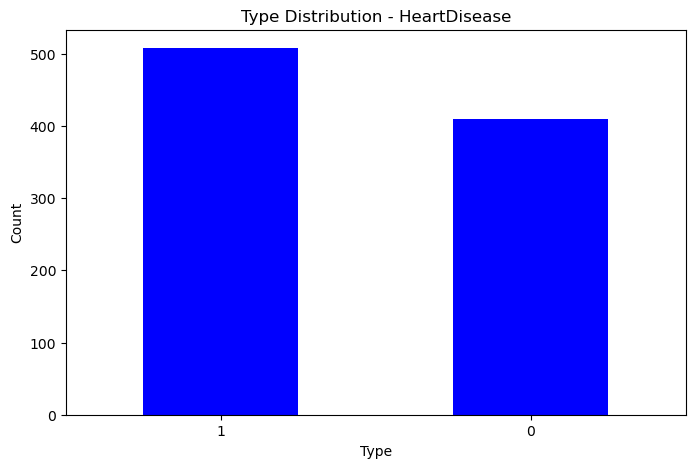

In [10]:
type_counts = data['HeartDisease'].value_counts()

# Create a bar plot for the type distribution
plt.figure(figsize=(8, 5))
type_counts.plot(kind='bar', color='blue')
plt.title('Type Distribution - HeartDisease')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [11]:
hd_corr = data.corr()["HeartDisease"].sort_values(ascending=False)
print(hd_corr)
#[1: heart disease, 0: Normal]

HeartDisease            1.000000
ExerciseAngina          0.494282
Oldpeak_Category        0.423730
Sex                     0.305445
FastingBS               0.267291
Age_Category            0.263913
RestingBP_Category      0.077988
RestingECG              0.057384
Cholesterol_Category   -0.192774
ChestPainType          -0.386828
MaxHR_Category         -0.399085
ST_Slope               -0.558771
Name: HeartDisease, dtype: float64


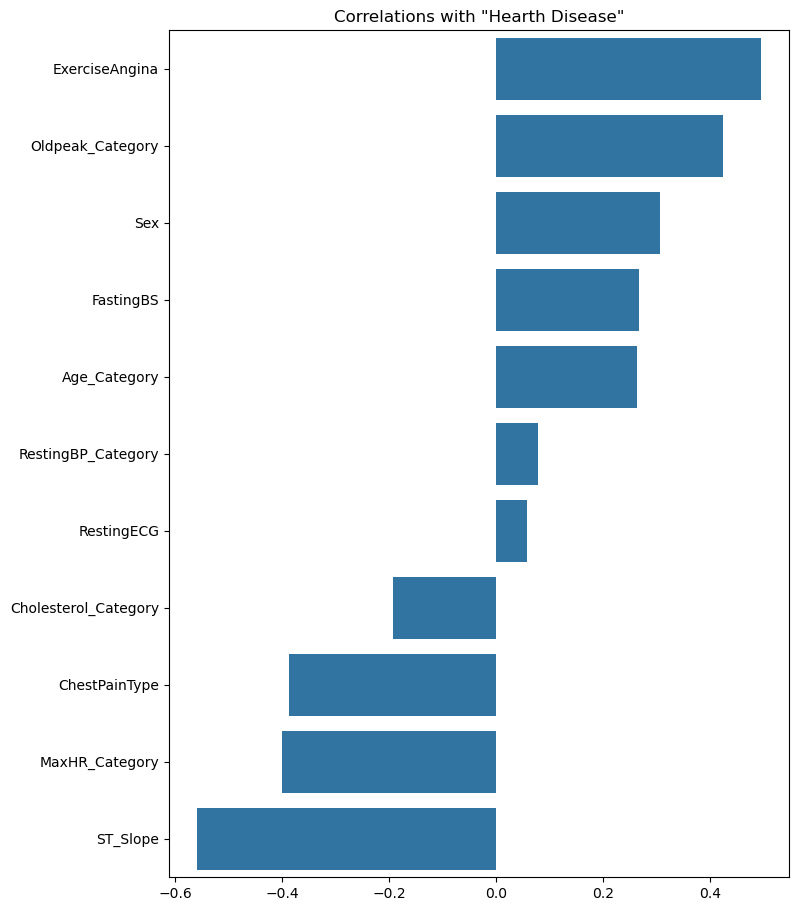

In [12]:
# Correlations with "Status"

limit = -1.0

indices = hd_corr.index
labels = []
corr = []
for i in range(1, len(indices)):
    if hd_corr[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(hd_corr[i])


fig, ax = plt.subplots(figsize=(8,11))
sns.barplot(x=corr, y=labels, ax=ax)
plt.title('Correlations with "Hearth Disease"')
plt.show()


In [13]:
target_variable = 'HeartDisease' 
X = data.drop(columns=[target_variable])
y = data[target_variable]

X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=random_state, train_size=0.80)

train_data = pd.concat([X_train, y_train], axis=1)

### Model Construction

The graph is acyclic: True


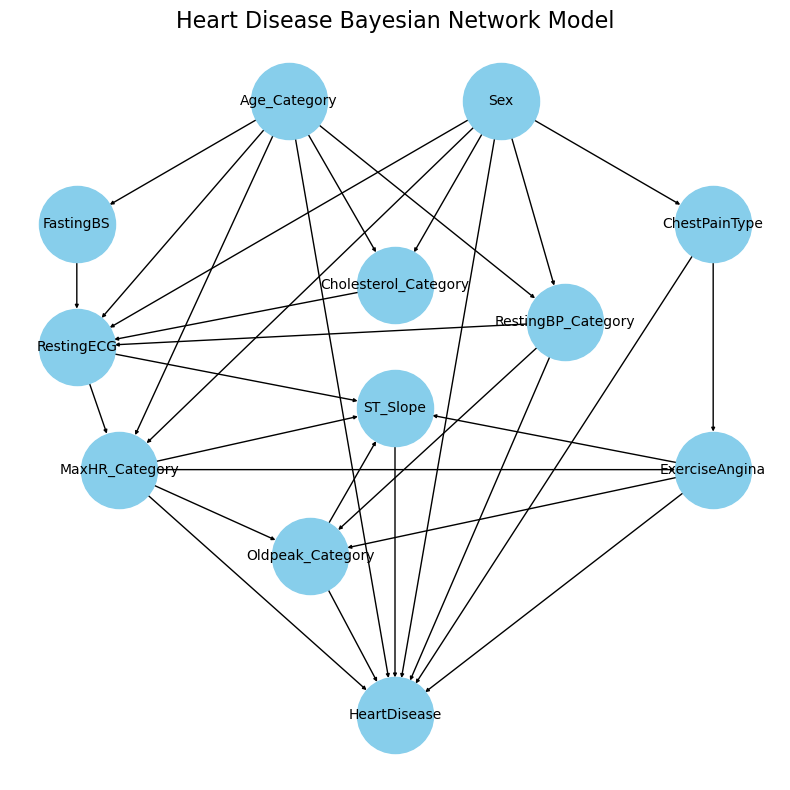

In [ ]:
# Define the "Custom" Bayesian Network structure

heart_disease_model = BayesianNetwork([
    ('Age_Category', 'RestingBP_Category'), ('Age_Category', 'Cholesterol_Category'), ('Age_Category', 'MaxHR_Category'),
    ('Age_Category', 'RestingECG'), ('Age_Category', 'FastingBS'), ('Age_Category', 'HeartDisease'), 
    ('Sex', 'Cholesterol_Category'),('Sex', 'MaxHR_Category'), ('Sex', 'RestingECG'),  ('Sex', 'RestingBP_Category'), ('Sex', 'ChestPainType'), ('Sex', 'HeartDisease'),
    ('FastingBS', 'RestingECG'),
    ('Cholesterol_Category', 'RestingECG'),
    ('RestingBP_Category', 'RestingECG'), ('RestingBP_Category', 'Oldpeak_Category'), ('RestingBP_Category', 'HeartDisease'),
    ('RestingECG', 'ST_Slope'), ('RestingECG', 'MaxHR_Category'),
    ('MaxHR_Category', 'ST_Slope'), ('MaxHR_Category', 'ExerciseAngina'), ('MaxHR_Category', 'Oldpeak_Category'), ('MaxHR_Category', 'HeartDisease'), 
    ('ChestPainType', 'ExerciseAngina'), ('ChestPainType', 'HeartDisease'),
    ('ExerciseAngina', 'ST_Slope'), ('ExerciseAngina', 'Oldpeak_Category'), ('ExerciseAngina', 'HeartDisease'),
    ('Oldpeak_Category', 'ST_Slope'), ('Oldpeak_Category', 'HeartDisease'),
    ('ST_Slope', 'HeartDisease')
])

pos = {'Age_Category': [0.75, -0.5], 'Sex': [1.25, -0.5],
       'FastingBS': [0.25, -1.], 'Cholesterol_Category': [1., -1.25], 'ChestPainType': [1.75,  -1],
       'RestingBP_Category': [1.40, -1.40], 'RestingECG': [0.25, -1.5],
       'MaxHR_Category': [0.35,  -2],
       'ExerciseAngina': [1.75, -2], 'Oldpeak_Category': [0.80, -2.35], 'ST_Slope': [1.,  -1.75], 
       'HeartDisease': [1, -3]}

is_acyclic = nx.is_directed_acyclic_graph(heart_disease_model)
print(f"The graph is acyclic: {is_acyclic}")

# --- Visualization ---
# Create a figure and axes for the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

nx.draw_networkx(heart_disease_model, pos=pos, ax=ax, node_size=3000,
                 node_color='skyblue', font_size=10, arrows=True, arrowsize=5)

# Set the title and save the figure
ax.set_title('Heart Disease Bayesian Network Model', fontsize=16)
plt.axis('off') # Turn off the axis box
fig.tight_layout() # Adjust layout
plt.savefig(f"{project_cwd}/out/custom_bn.png")


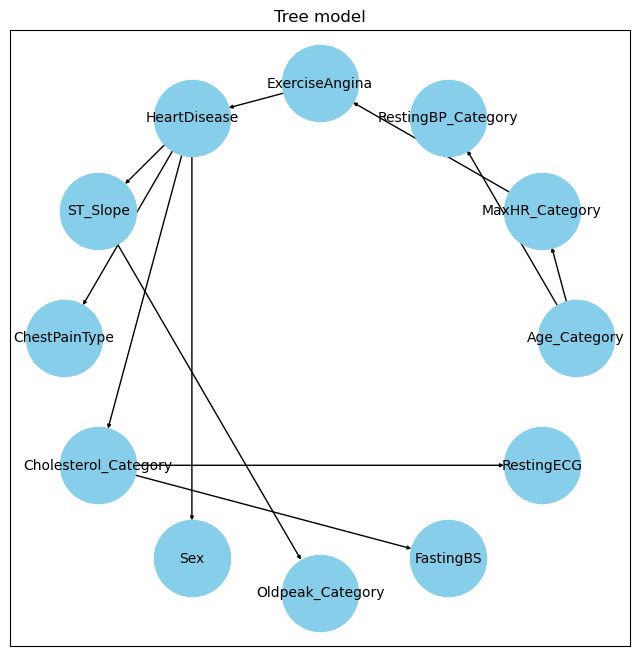

In [15]:
ts = TreeSearch(data=train_data, root_node='Age_Category' ) # Age_Category - Sex
tree_model = ts.estimate(show_progress=False)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
nx.draw_networkx(tree_model, pos=nx.drawing.layout.circular_layout(tree_model), ax=ax, node_size=3000,
                     node_color='skyblue', font_size=10, arrows=True, arrowsize=5)

plt.savefig(f"{project_cwd}/out/tree.png")
ax.set_title('Tree model')
tree_model = BayesianNetwork(tree_model.edges())

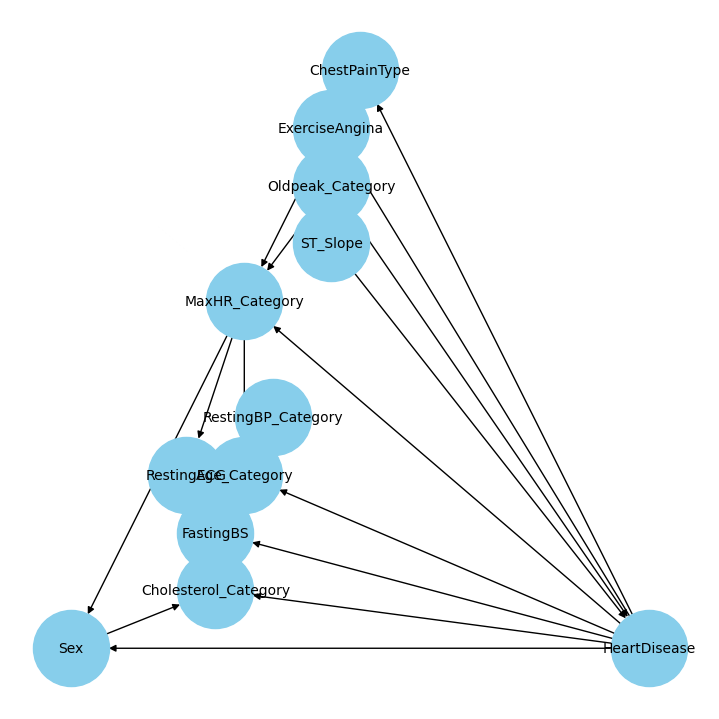

In [ ]:
scoring_method = K2Score(data=train_data)
hc = HillClimbSearch(data=train_data) 
hc_k2score_model = hc.estimate(scoring_method=scoring_method,
                               max_indegree=4, max_iter=int(1e4), show_progress=False)

fig = plt.figure(figsize=(7, 7))
nx.draw(hc_k2score_model, with_labels=True, arrowsize=10, node_size=3000, node_color='skyblue', font_size=10, pos=nx.planar_layout(hc_k2score_model))
plt.savefig(f"{project_cwd}/out/hc_k2score_model.png")

ax.set_title('HC base model')
hc_k2score_model = BayesianNetwork(hc_k2score_model.edges())

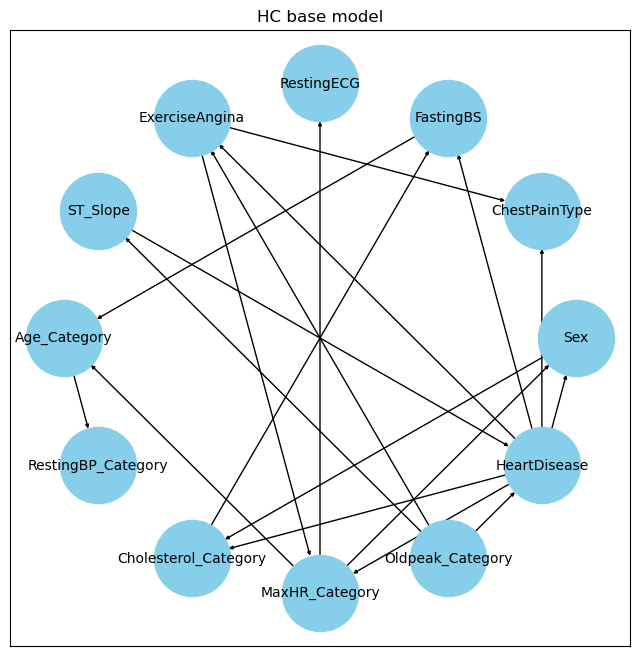

In [17]:
scorer = BDeuScore(data=train_data)
hc = HillClimbSearch(data=train_data)
hc_bdscore_model = hc.estimate(scoring_method=scorer, max_iter=int(1e4), show_progress=False)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
nx.draw_networkx(hc_bdscore_model, pos=nx.drawing.layout.circular_layout(hc_bdscore_model), ax=ax, node_size=3000,
                     node_color='skyblue', font_size=10, arrows=True, arrowsize=5)
plt.savefig(f"{project_cwd}/out/hc_bdscore_model.png")

ax.set_title('HC base model')
hc_bdscore_model = BayesianNetwork(hc_bdscore_model.edges())

In [18]:
models = [('custom', heart_disease_model), ('tree', tree_model), 
          ('hc k2score', hc_k2score_model), ('hc bdscore', hc_bdscore_model)]
for name, model in models:
    print(f'Computing CPD (CPT) for {name} model')   # CPT per le variabili discrete, CPD è il concetto generale: descrive la dipendenza probabilistica P(Nodo | Genitori).
    model.fit(train_data, estimator=MaximumLikelihoodEstimator)
    for cpd in model.get_cpds():
        print(cpd, "\n")
    print("- " * 40)

Computing CPD (CPT) for custom model
+-----------------+----------+
| Age_Category(0) | 0.19346  |
+-----------------+----------+
| Age_Category(1) | 0.565395 |
+-----------------+----------+
| Age_Category(2) | 0.241144 |
+-----------------+----------+ 

+-----------------------+-----+---------------------+
| Age_Category          | ... | Age_Category(2)     |
+-----------------------+-----+---------------------+
| Sex                   | ... | Sex(1)              |
+-----------------------+-----+---------------------+
| RestingBP_Category(0) | ... | 0.13286713286713286 |
+-----------------------+-----+---------------------+
| RestingBP_Category(1) | ... | 0.3916083916083916  |
+-----------------------+-----+---------------------+
| RestingBP_Category(2) | ... | 0.4755244755244755  |
+-----------------------+-----+---------------------+ 

+-------------------------+-----+---------------------+
| Age_Category            | ... | Age_Category(2)     |
+-------------------------+-----+---

##### Check the consistency of the models

In [19]:
for name, model in models:
    is_consistent = model.check_model()
    print(f"The model {name} is consistent: {is_consistent}")

The model custom is consistent: True
The model tree is consistent: True
The model hc k2score is consistent: True
The model hc bdscore is consistent: True


In [20]:
nodes = ['Sex', 'Age_Category', 'FastingBS', 'MaxHR_Category', 'ST_Slope', 'Cholesterol_Category', 'HeartDisease']
print('Considering nodes:', nodes)
for name, model in models:
    print(f'Analyzing model: {name}')
    print(f'The total number of valid independence assertions is {len(model.get_independencies().get_assertions())}')
    print(f'Local semantics of the current model:\n{model.local_independencies(nodes)}')
    print('Checking Markov blankets')
    for node in nodes:
        print(f'The Markov blanket of node {node} is {model.get_markov_blanket(node)}')
    print()

Considering nodes: ['Sex', 'Age_Category', 'FastingBS', 'MaxHR_Category', 'ST_Slope', 'Cholesterol_Category', 'HeartDisease']
Analyzing model: custom
The total number of valid independence assertions is 2822
Local semantics of the current model:
(Sex ⟂ Age_Category, FastingBS)
(Age_Category ⟂ Sex, ChestPainType)
(FastingBS ⟂ Cholesterol_Category, RestingBP_Category, Sex, ChestPainType | Age_Category)
(MaxHR_Category ⟂ Cholesterol_Category, RestingBP_Category, ChestPainType, FastingBS | RestingECG, Sex, Age_Category)
(ST_Slope ⟂ Cholesterol_Category, Sex, ChestPainType, FastingBS, RestingBP_Category, Age_Category | RestingECG, MaxHR_Category, Oldpeak_Category, ExerciseAngina)
(Cholesterol_Category ⟂ RestingBP_Category, ChestPainType, FastingBS | Sex, Age_Category)
(HeartDisease ⟂ RestingECG, Cholesterol_Category, FastingBS | Oldpeak_Category, ST_Slope, MaxHR_Category, Age_Category, ExerciseAngina, Sex, ChestPainType, RestingBP_Category)
Checking Markov blankets
The Markov blanket of nod

In [21]:
inferences = [(name, VariableElimination(model)) for name, model in models]

Performing inference for model: custom
Performing inference for model: tree
Performing inference for model: hc k2score
Performing inference for model: hc bdscore


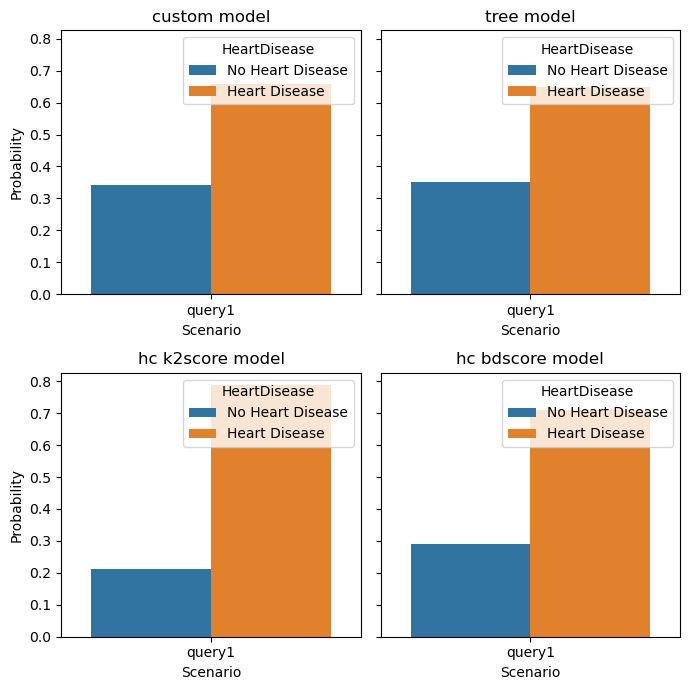

In [22]:
# Query 1: P(HeartDisease | Age_Category=2 (Senior), Sex=1 (Male))

evidence = {'Age_Category': 2, 'Sex': 1}
results_query1 = {}
for name, inference in inferences:
    results_query1[name] = {}
    print(f"Performing inference for model: {name}")
    results_query1[name]['query1'] = inference.query(["HeartDisease"], evidence, show_progress=False).values

plot_values(results_query1, label_map={0: 'No Heart Disease', 1: 'Heart Disease'})

### Which Chest pain type cause a high risk of Heart disease in an male Adult patient?

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

Scenario: ST_Slope of an old male man
Possible pain type: [0, 1, 2]
Performing inference for model: custom
Performing inference for model: tree
Performing inference for model: hc k2score
Performing inference for model: hc bdscore


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


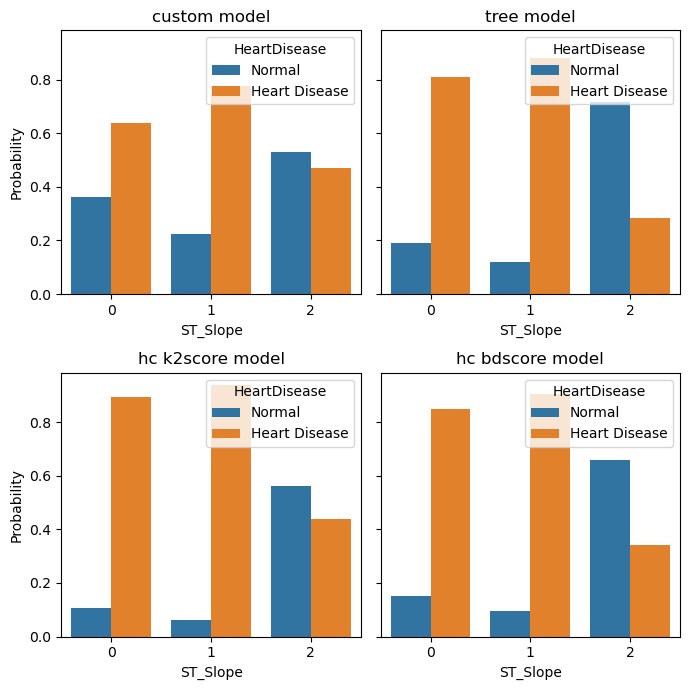

In [ ]:
synthom = "ST_Slope"

pain_types = [0, 1, 2] # [Down: 0, Flat: 1, Up: 2]
answer_pain_types = {}
evidence = {"Age_Category": 2, "Sex": 1}
print(f"Scenario: {synthom} of an old male man")
print(f"Possible pain type: {pain_types}")
for name, inference in inferences:
    answer_pain_types[name] = {}
    print(f"Performing inference for model: {name}")
    for pain_type in pain_types:
        evidence[synthom] = pain_type
        answer_pain_types[name][pain_type] = inference.query(["HeartDisease"], evidence, show_progress=False).values

plot_values(answer_pain_types, label_map={0: 'Normal', 1: 'Heart Disease'}, x=synthom, state_col='HeartDisease', y='Probability')
            


Results show Flat and Downsloping ST segment patterns are most associated with Heart Disease, aligning with clinical findings.
- Flat slope: Indicates myocardial ischemia and increased cardiovascular risk.
- Downsloping slope: Strongly suggests more severe ischemia and carries a bad prognosis.

#### Evolution of risk by age and chest pain type

Scenarios: probability following the pairs of Age_Category/ChestPainType 
[(0, 0), (0, 1), (0, 2), (0, 3)]
Performing inference for model: custom
Performing inference for model: tree
Performing inference for model: hc k2score
Performing inference for model: hc bdscore


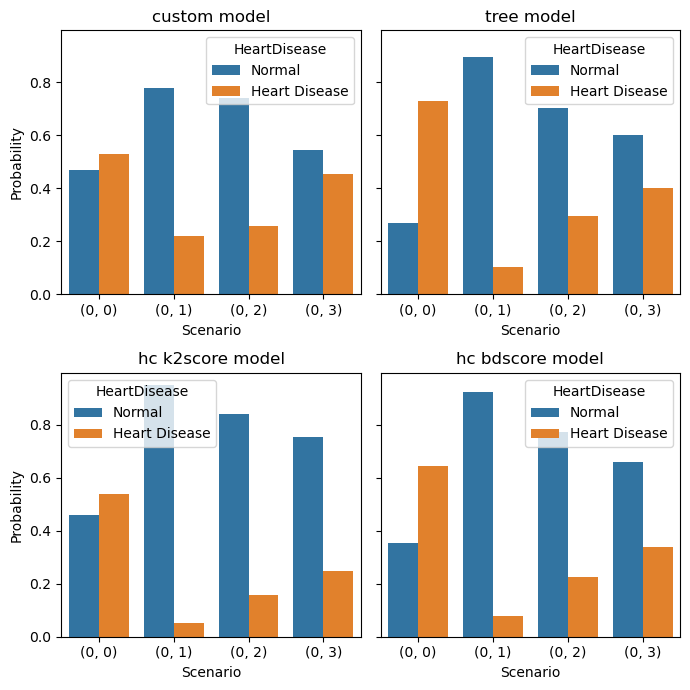

In [30]:
age = 0
values = [(age, 0), (age, 1), (age, 2), (age, 3)] #'ASY' → 0 'ATA' → 1 'NAP' → 2 'TA' → 3
answer_values = {}
print(f"Scenarios: probability following the pairs of Age_Category/ChestPainType \n{values}")
for name, inference in inferences:
    print(f"Performing inference for model: {name}")
    answer_values[name] = {}
    for age, chest_pain_type in values:
        evidence = {"Age_Category": age, "ChestPainType": chest_pain_type}
        answer_values[name][(age, chest_pain_type)] = inference.query(["HeartDisease"], evidence, show_progress=False).values
plot_values(answer_values, label_map={0: 'Normal', 1: 'Heart Disease'})

Results confirms ASY (Asymptomatic) and TA (Typical Angina) are most linked  to Heart Disease in this data.

TA is the classic symptom; 
ASY reflects the known danger of silent/late-diagnosed disease (high risk despite no typical pain).

The probability is now in favor of Asymptomatic and Typical Angina. So we can deduce that this two factors has some influence in heart disease. 
Let's see the full spectrum now:

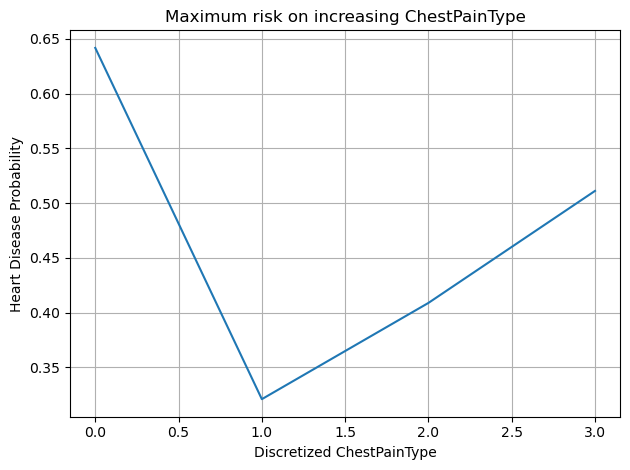

In [38]:
from pgmpy.factors.discrete import State

exact_inference = inferences[0][1] #custom model
illness = "ChestPainType"

heart_disease = []
predictions_list = []
for t in range(data[illness].max() + 1):
    evidence = [State(illness, t)]
    prob = exact_inference.query(["HeartDisease"], evidence=dict(evidence), show_progress=False)
    heart_disease.append(prob.values[-1])

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(range(len(heart_disease)), heart_disease)
plt.title(f"Maximum risk on increasing {illness}")
plt.xlabel(f"Discretized {illness}")
plt.ylabel("Heart Disease Probability")
plt.grid()
plt.tight_layout()
plt.savefig(f"{project_cwd}/out/inc_temp.png")
plt.show()

### Let's see our model outcomes

In [40]:
from sklearn.metrics import accuracy_score
from sklearn import metrics


for name, model in models:
    predictions_df = model.predict(X_test)
    print(f"Evaluating model: {name}")
    y_pred = predictions_df[target_variable]
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on the test set: {accuracy:.4f}")

    print("Predicted: ", y_pred[:10].values)
    print("True: ", y_test[:10].values)

    report = metrics.classification_report(y_test, y_pred)
    print("Report: \n", report)

    print("- " * 40)


  0%|          | 0/172 [00:00<?, ?it/s]

Evaluating model: custom
Accuracy on the test set: 0.7391
Predicted:  [0 1 1 1 1 1 0 0 0 0]
True:  [0 1 1 1 1 1 0 0 0 0]
Report: 
               precision    recall  f1-score   support

           0       0.62      0.93      0.75        76
           1       0.93      0.60      0.73       108

    accuracy                           0.74       184
   macro avg       0.78      0.77      0.74       184
weighted avg       0.80      0.74      0.74       184

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


  0%|          | 0/172 [00:00<?, ?it/s]

Evaluating model: tree
Accuracy on the test set: 0.8967
Predicted:  [0 1 1 1 1 1 0 0 0 1]
True:  [0 1 1 1 1 1 0 0 0 0]
Report: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        76
           1       0.91      0.92      0.91       108

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


  0%|          | 0/172 [00:00<?, ?it/s]

Evaluating model: hc k2score
Accuracy on the test set: 0.8587
Predicted:  [1 1 1 1 1 1 0 1 0 1]
True:  [0 1 1 1 1 1 0 0 0 0]
Report: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        76
           1       0.86      0.91      0.88       108

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


  0%|          | 0/172 [00:00<?, ?it/s]

Evaluating model: hc bdscore
Accuracy on the test set: 0.8750
Predicted:  [1 1 1 1 1 1 0 0 0 1]
True:  [0 1 1 1 1 1 0 0 0 0]
Report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        76
           1       0.88      0.91      0.89       108

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


### Performance test

In [28]:
iter = 10000
evidence = {'Age_Category': 2, 'Sex': 1}

for name, inference in inferences:
    start_time = time.time()
    for i in range(iter):
        inference.query(["HeartDisease"], evidence, show_progress=False).values
    end_time = time.time()
    elapsed_time = (end_time - start_time) / iter
    print(f"Elapsed time for {name}: ", elapsed_time, "seconds")

Elapsed time for custom:  0.0006840695858001709 seconds
Elapsed time for tree:  0.0002580550193786621 seconds
Elapsed time for hc k2score:  0.09730168919563294 seconds
Elapsed time for hc bdscore:  0.06602933871746063 seconds
